# Vehicle Loan Defaulters Prediction - Model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Vehicle Loan Predictions/")
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from lightgbm import LGBMClassifier
# from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
#col_dtypes = {'user_id': np.object, 'session_id': np.object, 'campaign_id': np.object, 'webpage_id': np.object}
train_dataset = pd.read_csv ('Dataset/Train - PreProcessed Data .csv')
test_dataset = pd.read_csv('Dataset/Test - PreProcessed Data .csv')

test_dataset.head(1)

,Current_Pincode_ID,Delinquent_Accts_In_Last_Six_Months,Employee_Code_ID,Mobile_No_Avl_Flag,New_Accts_In_Last_Six_Months,No_Of_Inquiries,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_Active_Accts,Pri_Current_Balance,Pri_No_Of_Accts,Pri_Overdue_Accts,Pri_Sanctioned_Amount,Primary_Instal_AMT,Sec_Active_Accts,Sec_Instal_AMT,Sec_No_Of_Accts,Sec_Sanctioned_Amount,State_ID,Unique_ID,Asset_Cost,Branch_ID,Disbursed_Amount,Ltv,Manufacturer_ID,Supplier_ID,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week,EmploymentType_Self employed,AadharFlag_1,PANFlag_1,VoterIDFlag_1,DrivingFlag_1,PassportFlag_1,SecOverdueAccts_0,SecOverdueAccts_1,SecOverdueAccts_2,SecOverdueAccts_3,SecOverdueAccts_4,SecOverdueAccts_5,SecOverdueAccts_6,SecOverdueAccts_7,SecOverdueAccts_8
0,1497,0,1998,1,0,0,0,13,0,0,0,0,0,0,0,0,0,0,5,655269,63558,67,53478,86.54,0,22807,0,0,52013.951394,69505.112018,77.258496,195407.960452,7451.712819,52103.0,66871.0,79.45,0,0,54561.309609,76701.110107,74.104481,0.0,1223.719482,54078.0,71936.0

In [5]:
train_dataset.isnull().sum()

Current_Pincode_ID                                        0
Delinquent_Accts_In_Last_Six_Months                       0
Employee_Code_ID                                          0
Mobile_No_Avl_Flag                                        0
New_Accts_In_Last_Six_Months                              0
No_Of_Inquiries                                           0
Perform_CNS_Score                                         0
Perform_CNS_Score_Description                             0
Pri_Active_Accts                                          0
Pri_Current_Balance                                       0
Pri_No_Of_Accts                                           0
Pri_Overdue_Accts                                         0
Pri_Sanctioned_Amount                                     0
Primary_Instal_AMT                                        0
Sec_Active_Accts                                          0
Sec_Instal_AMT                                            0
Sec_No_Of_Accts                         

In [0]:
label = train_dataset.Loan_Default
train_predictors = train_dataset.drop('Loan_Default', axis = 1).select_dtypes(exclude = ['object'])
test_predictors = test_dataset.select_dtypes(exclude = ['object'])

### Normalize the data

In [7]:
from sklearn.preprocessing import StandardScaler
#Normalise the data with standard scalar
std_scale = StandardScaler().fit(train_predictors)
train_predictors1 = pd.DataFrame(std_scale.transform(train_predictors))
train_predictors1.columns  = train_predictors.columns
train_predictors = train_predictors1

test_predictors1 = pd.DataFrame(std_scale.transform(test_predictors))
test_predictors1.columns  = test_predictors.columns
test_predictors = test_predictors1
#print(pd.DataFrame(train_predictors))
display(train_predictors.head())
train_predictors.head()

,Current_Pincode_ID,Delinquent_Accts_In_Last_Six_Months,Employee_Code_ID,Mobile_No_Avl_Flag,New_Accts_In_Last_Six_Months,No_Of_Inquiries,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_Active_Accts,Pri_Current_Balance,Pri_No_Of_Accts,Pri_Overdue_Accts,Pri_Sanctioned_Amount,Primary_Instal_AMT,Sec_Active_Accts,Sec_Instal_AMT,Sec_No_Of_Accts,Sec_Sanctioned_Amount,State_ID,Unique_ID,Asset_Cost,Branch_ID,Disbursed_Amount,Ltv,Manufacturer_ID,Supplier_ID,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week,EmploymentType_Self employed,AadharFlag_1,PANFlag_1,VoterIDFlag_1,DrivingFlag_1,PassportFlag_1,SecOverdueAccts_0,SecOverdueAccts_1,SecOverdueAccts_2,SecOverdueAccts_3,SecOverdueAccts_4,SecOverdueAccts_5,SecOverdueAccts_6,SecOverdueAccts_7,SecOverdueAccts_8
0,-0.873885,-0.254153,0.459901,0.0,-0.40047,-0.293461,-0.855453,0.674034,-0.542998,-0.176064,-0.467804,-0.285688,-0.092010,-0.086581,-0.08997,-0.020784,-0.096368,-0.039835,-0.281611,-1.684720,-0.921895,-0.085002,-0.291335,1.292133,-1.447134,0

,Current_Pincode_ID,Delinquent_Accts_In_Last_Six_Months,Employee_Code_ID,Mobile_No_Avl_Flag,New_Accts_In_Last_Six_Months,No_Of_Inquiries,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_Active_Accts,Pri_Current_Balance,Pri_No_Of_Accts,Pri_Overdue_Accts,Pri_Sanctioned_Amount,Primary_Instal_AMT,Sec_Active_Accts,Sec_Instal_AMT,Sec_No_Of_Accts,Sec_Sanctioned_Amount,State_ID,Unique_ID,Asset_Cost,Branch_ID,Disbursed_Amount,Ltv,Manufacturer_ID,Supplier_ID,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week,EmploymentType_Self employed,AadharFlag_1,PANFlag_1,VoterIDFlag_1,DrivingFlag_1,PassportFlag_1,SecOverdueAccts_0,SecOverdueAccts_1,SecOverdueAccts_2,SecOverdueAccts_3,SecOverdueAccts_4,SecOverdueAccts_5,SecOverdueAccts_6,SecOverdueAccts_7,SecOverdueAccts_8
0,-0.873885,-0.254153,0.459901,0.0,-0.40047,-0.293461,-0.855453,0.674034,-0.542998,-0.176064,-0.467804,-0.285688,-0.092010,-0.086581,-0.08997,-0.020784,-0.096368,-0.039835,-0.281611,-1.684720,-0.921895,-0.085002,-0.291335,1.292133,-1.447134,0

In [0]:
train_predictors.shape

(233154, 123)

#### Split the data into train and validation set 

In [0]:
X = train_predictors
y = label
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.33, random_state = 3)

#### Model Selection

In [9]:
pip install catboost

     |████████████████████████████████| 61.2MB 1.2MB/s 


In [0]:
#Import the packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score
import math

In [0]:
#Build the Model
ModelList = [
    #GLM
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    #SVC(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose = False),
    AdaBoostClassifier(),
  ]

ModelList_columns = []
ModelList_compare = pd.DataFrame(columns = ModelList_columns)


In [0]:
row_index = 0
for alg in ModelList:
    model = alg.fit(X_train, y_train)
    predicted = model.predict(X_validate)
    predicted_prob = model.predict_proba(X_validate)[:,1]
    fp, tp, threshold = metrics.roc_curve(y_validate, predicted_prob)
    ModelList_name = alg.__class__.__name__
    ModelList_compare.loc[row_index, 'Algorithm Name'] = ModelList_name
    ModelList_compare.loc[row_index, 'Precission'] = metrics.precision_score(y_validate, predicted)
    ModelList_compare.loc[row_index, 'Sensitivity/Recall'] = metrics.recall_score(y_validate, predicted)
    ModelList_compare.loc[row_index, 'AUC'] = roc_auc_score(y_validate, predicted_prob)
    ModelList_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    ModelList_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_validate, y_validate), 4)

    row_index = row_index  + 1
    print('Algorithm Completed:', alg)
ModelList_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
ModelList_compare

Algorithm Completed: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Algorithm Completed: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Algorithm Completed: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 

,Algorithm Name,Precission,Sensitivity/Recall,AUC,Train Accuracy,Test Accuracy
5,CatBoostClassifier,0.525696,0.029141,0.670431,0.7931,0.7816
4,LGBMClassifier,0.556641,0.016915,0.667322,0.7874,0.7818
3,XGBClassifier,0.557522,0.003739,0.658858,0.7844,0.7812
6,AdaBoostClassifier,0.474576,0.016618,0.651352,0.7836,0.7806
0,LogisticRegression,0.450199,0.006707,0.639303,0.7837,0.7807
2,RandomForestClassifier,0.367805,0.065226,0.590053,0.9763,0.7707
1,DecisionTreeClassifier,0.263211,0.279661,0.530082,1.0000,0.6708


#### Feature Selection

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state = 3, max_depth=5)
model.fit(train_predictors, label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [12]:
train_predictors.index

RangeIndex(start=0, stop=233154, step=1)

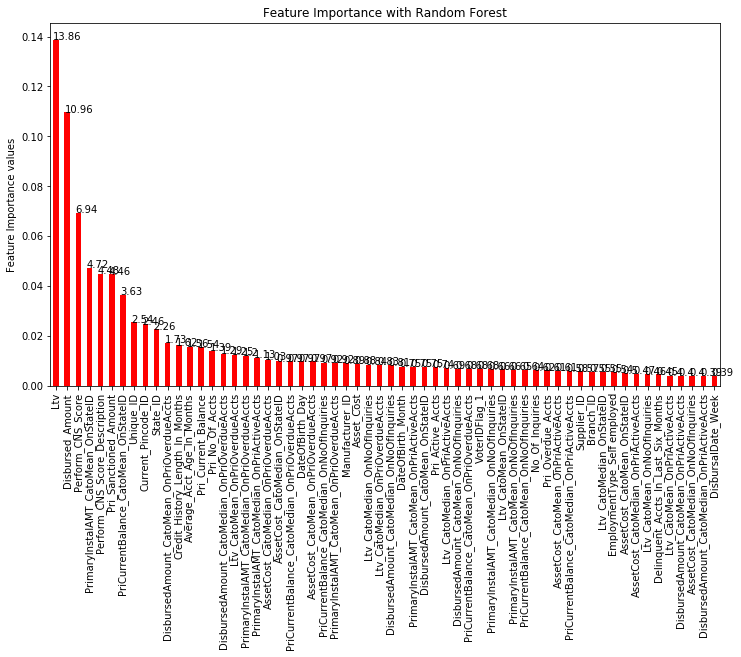

In [13]:
# Plot the top 60 important features
important_features = pd.Series(model.feature_importances_, index = train_predictors.columns).sort_values(ascending=False)
ax = important_features[:60].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8), color='r')
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
#plt.savefig('L&T Finance.png')

#for getting the values on each bar
for i in ax.patches:
    ax.annotate(round(i.get_height()*100, 2), (i.get_x(), i.get_height()))

plt.show()

In [14]:
important_features.index[:60]

Index(['Ltv', 'Disbursed_Amount', 'Perform_CNS_Score',
       'PrimaryInstalAMT_CatoMean_OnStateID', 'Perform_CNS_Score_Description',
       'Pri_Sanctioned_Amount', 'PriCurrentBalance_CatoMean_OnStateID',
       'Unique_ID', 'Current_Pincode_ID', 'State_ID',
       'DisbursedAmount_CatoMean_OnPriOverdueAccts',
       'Credit_History_Length_In_Months', 'Average_Acct_Age_In_Months',
       'Pri_Current_Balance', 'Pri_No_Of_Accts',
       'DisbursedAmount_CatoMedian_OnPriOverdueAccts',
       'Ltv_CatoMean_OnPriOverdueAccts',
       'PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts',
       'PrimaryInstalAMT_CatoMedian_OnPriActiveAccts',
       'AssetCost_CatoMedian_OnPriOverdueAccts',
       'AssetCost_CatoMedian_OnStateID',
       'PriCurrentBalance_CatoMedian_OnPriOverdueAccts', 'DateOfBirth_Day',
       'AssetCost_CatoMean_OnPriOverdueAccts',
       'PriCurrentBalance_CatoMedian_OnNoOfInquiries',
       'PrimaryInstalAMT_CatoMean_OnPriOverdueAccts', 'Manufacturer_ID',
       'Asset_Cost

In [15]:
round(important_features.head(60) * 100, 2)

Ltv                                               13.86
Disbursed_Amount                                  10.96
Perform_CNS_Score                                  6.94
PrimaryInstalAMT_CatoMean_OnStateID                4.72
Perform_CNS_Score_Description                      4.48
Pri_Sanctioned_Amount                              4.46
PriCurrentBalance_CatoMean_OnStateID               3.63
Unique_ID                                          2.54
Current_Pincode_ID                                 2.46
State_ID                                           2.26
DisbursedAmount_CatoMean_OnPriOverdueAccts         1.73
Credit_History_Length_In_Months                    1.62
Average_Acct_Age_In_Months                         1.56
Pri_Current_Balance                                1.54
Pri_No_Of_Accts                                    1.39
DisbursedAmount_CatoMedian_OnPriOverdueAccts       1.29
Ltv_CatoMean_OnPriOverdueAccts                     1.25
PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts   

In [16]:
# Now select top 60 features in predictor datasetand discard other features
train_predictors = train_predictors[important_features.index[:60]]
test_predictors = test_predictors[important_features.index[:60]]
display(train_predictors.sample(10))
test_predictors.sample(10)

,Ltv,Disbursed_Amount,Perform_CNS_Score,PrimaryInstalAMT_CatoMean_OnStateID,Perform_CNS_Score_Description,Pri_Sanctioned_Amount,PriCurrentBalance_CatoMean_OnStateID,Unique_ID,Current_Pincode_ID,State_ID,DisbursedAmount_CatoMean_OnPriOverdueAccts,Credit_History_Length_In_Months,Average_Acct_Age_In_Months,Pri_Current_Balance,Pri_No_Of_Accts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,DateOfBirth_Day,AssetCost_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,Manufacturer_ID,Asset_Cost,Ltv_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnNoOfInquiries,DateOfBirth_Month,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMean_OnStateID,Pri_Active_Accts,Ltv_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnPriOverdueAccts,VoterIDFlag_1,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,Ltv_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,No_Of_Inquiries,Pri_Overdue_Accts,AssetCost_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,Supplier_ID,Branch_ID,Ltv_CatoMedian_OnStateID,EmploymentType_Self employed,AssetCost_CatoMean_OnStateID,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMean_OnNoOfInquiries,Delinquent_Accts_In_Last_Six_Months,Ltv_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMedian_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnPriActiveAccts,DisbursalDate_Week
42852,1.320065,0.143548,0.031140,0.887806,0.477477,-0.081483,1.067143,-1.347666,-0.024520,0.387700,2.177449,0.481001,1.395717,-0.150261,-0.276131,2.028852,2.253625,0.650258,-0.045820,-2.315494,-0.042348,0.628303,1.581922,-1.932571,-0.300500,1.309855,0.833823,-0.597795,-0.389063,2.481564,-0.358784,0.572029,-0.093120,0.533984,-0.020453,0.597224,-0.367200,1.246929,-0.411719,-0.326051,0.777059,-0.378420,-0.368604,-0.293461,1.539475,-1.023460,-0.084639,-1.138517,-0.972811,0.751146,-1.141453,-0.207916,-1.146139,-0.387150,-0.254153,0.457698,-0.007349,0.378755,-0.133177,-0.501482
158584,-0.251953,1.005298,-0.855453,-0.476858,0.674034,-0.092010,-1.261914,-0.892455,1.097392,-0.950922,-0.331368,-0.568640,-0.590198,-0.176064,-0.467804,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,1.443013,-0.150644,0.930960,0.301641,-0.300500,-0.260786,-0.990943,1.210464,-0.389063,-0.349565,-0.358784,0.044018,-0.348433,0.263503,-0.542998,-0.782884,-0.367200,-0.250646,-0.411719,-0.326051,-1.518379,-0.378420,-0.368604,-0.293461,-0.285688,0.770891,-0.144216,0.989525,2.607064,-1.502305,0.876076,1.437463,0.802556,-0.387150,-0.254153,-0.750799,-0.599670,0.378755,-0.543268,-0.256844
59168,0.479502,-0.540270,-0.855453,-0.314668,0.674034,-0.092010,0.564701,-1.343319,-0.904715,-0.281611,-0.331368,-0.568640,-0.590198,-0.176064,-0.467804,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,-1.273903,-0.150644,-0.479458,0.301641,-0.300500,-0.260786,-1.447134,-0.846729,-0.389063,-0.349565,-0.358784,-1.012004,-0.348433,-1.102847,-0.542998,-0.782884,-0.367200,-0.250646,-0.411719,-0.326051,0.601872,-0.378420,-0.368604,-0.293461,-0.285688,0.770891,-0.144216,-1.071505,-0.170919,0.621908,0.876076,-1.208691,0.802556,-0.387150,-0.254153,-0.750799,-0.599670,0.378755,-0.543268,-0.501482
89157,0.612177,-0.050419,1.582678,-0.314668,-1.881205,-0.092010,0.564701,-0.651324,-0.853779,-0.281611,-0.331368,-0.323723,-0.126818,-0.176064,-0.276131,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,-1.273903,-0.150644,0.496985,0.301641,-0.300500,-0.260786,-1.447134,-0.453692,-0.389063,-0.349565,-0.358784,0.572029,-0.348433,-1.102847,-0.542998,-0.782884,-0.367200,-0.250646,2.428842,-0.326051,0.601872,-0.378420,-0.368604,-0.293461,-0.28

,Ltv,Disbursed_Amount,Perform_CNS_Score,PrimaryInstalAMT_CatoMean_OnStateID,Perform_CNS_Score_Description,Pri_Sanctioned_Amount,PriCurrentBalance_CatoMean_OnStateID,Unique_ID,Current_Pincode_ID,State_ID,DisbursedAmount_CatoMean_OnPriOverdueAccts,Credit_History_Length_In_Months,Average_Acct_Age_In_Months,Pri_Current_Balance,Pri_No_Of_Accts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,DateOfBirth_Day,AssetCost_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,Manufacturer_ID,Asset_Cost,Ltv_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnNoOfInquiries,DateOfBirth_Month,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMean_OnStateID,Pri_Active_Accts,Ltv_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnPriOverdueAccts,VoterIDFlag_1,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,Ltv_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,No_Of_Inquiries,Pri_Overdue_Accts,AssetCost_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,Supplier_ID,Branch_ID,Ltv_CatoMedian_OnStateID,EmploymentType_Self employed,AssetCost_CatoMean_OnStateID,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMean_OnNoOfInquiries,Delinquent_Accts_In_Last_Six_Months,Ltv_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMedian_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnPriActiveAccts,DisbursalDate_Week
107879,0.270016,0.412913,-0.855453,-0.487207,0.674034,-0.092010,-0.875450,3.333508,1.732293,-0.058507,-0.331368,-0.568640,-0.590198,-0.176064,-0.467804,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,0.804775,-0.150644,-1.021926,0.301641,-0.3005,-0.260786,0.833823,0.131906,-0.389063,-0.349565,-0.358784,-1.012004,-0.348433,0.818105,-0.542998,-0.782884,-0.3672,-0.250646,-0.411719,-0.326051,-0.874700,-0.37842,-0.368604,-0.293461,-0.285688,0.770891,-0.144216,1.414217,2.062923,-0.834964,0.876076,1.412233,0.802556,-0.38715,-0.254153,-0.750799,-0.599670,0.378755,-0.543268,1.333298
96333,-0.036357,1.591516,-0.855453,-0.487207,0.674034,-0.092010,-0.875450,3.388722,1.721570,-0.058507,-0.331368,-0.568640,-0.590198,-0.176064,-0.467804,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,0.804775,-0.150644,-0.804939,0.301641,-0.3005,-0.260786,-0.078560,1.463780,-0.389063,-0.349565,-0.358784,-0.219988,-0.348433,0.818105,-0.542998,-0.782884,-0.3672,-0.250646,-0.411719,-0.326051,-0.874700,-0.37842,-0.368604,-0.293461,-0.285688,0.770891,-0.144216,1.393312,0.430500,-0.834964,0.876076,1.412233,0.802556,-0.38715,-0.254153,-0.750799,-0.599670,0.378755,-0.543268,1.333298
103874,0.655820,-1.061035,-0.855453,-0.267619,0.674034,-0.092010,1.413652,3.315137,-1.420321,1.949426,-0.331368,-0.568640,-0.590198,-0.176064,-0.467804,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,-1.474394,-0.150644,-1.021926,0.301641,-0.3005,-0.260786,-1.447134,-1.296670,-0.389063,-0.349565,-0.358784,-1.012004,-0.348433,-0.995438,-0.542998,-0.782884,-0.3672,-0.250646,-0.411719,-0.326051,0.563025,-0.37842,-0.368604,-0.293461,-0.285688,0.770891,-0.144216,1.400471,2.664342,0.569037,0.876076,-1.033316,0.802556,-0.38715,-0.254153,-0.750799,-0.599670,0.378755,-0.543268,1.333298
50472,-0.301706,0.005089,-0.855453,-0.388545,0.674034,-0.092010,-0.968569,2.575072,1.673316,0.610804,-0.331368,-0.568640,-0.590198,-0.176064,-0.467804,-0.319904,-0.342360,-0.139110,-0.158302,0.302206,-0.641221,-0.150644,-1.021926,0.301641,-0.3005,-0.260786,0.833823,0.201319,-0.389063,-0.349565,-0.358784,-1.012004,-0.348433,-1.284827,-0.542998,-0.782884,-0.3672,-0.250646,-0.411719,-0.326051,-0.469964,-0.37842,-0.368604,-0.293461,-0.285688,0.770891,-0.14

#### Split the training dataset into train and validation

In [0]:
X = train_predictors
y = label
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.33, random_state=3)

In [0]:
stack_train = pd.DataFrame(X_validate[['Unique_ID']])
stack_train['Loan_Default_Actual'] = y_validate
stack_test = pd.DataFrame(test_dataset.Unique_ID)

## Light GBM Classifier

In [0]:
lgbm_model = LGBMClassifier()

In [0]:
lgbm_model = lgbm_model.fit(X_train, y_train)
predicted = lgbm_model.predict(X_validate)
predicted_prob = lgbm_model.predict_proba(X_validate)[:,1]
fp, tp, threshold = metrics.roc_curve(y_validate, predicted_prob)

In [21]:
auc = roc_auc_score(y_validate, predicted_prob)
auc

0.6644152700205936

In [22]:
#convert into binary values
y_validate_pred1 = []
for i in range(len(predicted_prob)):
    print(predicted_prob[i])

0.15546342818236422
0.25860506293857277
0.10880989611542008
0.14118129808176874
0.26268876933479046
0.22841084650190646
0.07244650145430968
0.18439949249804202
0.12459103835042487
0.22661269939810433
0.3292613791782318
0.15805564066286878
0.11586218729939574
0.3303472742191553
0.131958197226149
0.4660120463515945
0.09134599546132337
0.10726058008523788
0.1007983531888684
0.10499949430299343
0.23171852619592584
0.2956870623885756
0.1729366943380292
0.08399945026785142
0.2555445557092322
0.08193951985136388
0.3433583485126748
0.28630501568795286
0.14624803315661827
0.22682168663636712
0.24041076861546465
0.25598427750343145
0.36134044556178085
0.12728530963274143
0.18005980186032675
0.35910490419023355
0.10099934255387824
0.18401258001755622
0.27572220209005527
0.23075752458664797
0.1335119493931293
0.23223430152565033
0.23861872507663934
0.2042991691788679
0.2998303207417846
0.2872648165885284
0.40758029507216037
0.23645137089043425
0.37810428857846223
0.3927461663908008
0.1930411682984

In [0]:
#convert into binary values
y_validate_pred1 = []
for i in range(len(predicted_prob)):
    
    if predicted_prob[i] > .3:       # setting threshold to .3
        y_validate_pred1.append(1)
    else:  
        y_validate_pred1.append(0)

In [24]:
#Prediction
y_pred = lgbm_model.predict(test_predictors)
predicted_prob = lgbm_model.predict_proba(test_predictors)[:,1]
print(predicted_prob)

#convert into binary values
y_pred1=[]
for i in range(len(predicted_prob)):
    
    if predicted_prob[i]>=.497305:       # setting threshold to .5
        y_pred1.append(1)
    else:  
        y_pred1.append(0)

[0.43867322 0.32035904 0.34103876 ... 0.3431327  0.46622766 0.20538526]


In [0]:
stack_train['Loan_Default_LGBM'] = y_validate_pred1
stack_test['Loan_Default_LGBM'] = y_pred1

test_dataset['Loan_Default'] = y_pred1
# Output the Dataframe into a CSV file
test_dataset[['Unique_ID', 'Loan_Default']].to_csv('Yash_VehicleLoanPredictions_LGB.csv',  index = False)
#test_dataset.drop('is_click_LGBM', axis = 1, inplace = True)

In [26]:
list1 = stack_train.ix[:,'Loan_Default_Actual']
list2 = stack_train.ix[:,'Loan_Default_LGBM']

list1.index

Int64Index([ 42020,  84490,  91498, 183843, 209523, 188597, 125121, 213728,
             12010, 138761,
            ...
             96307, 225788, 149464,   7596, 127534,  59689, 166465,  56950,
             15848,  68750],
           dtype='int64', length=76941)

In [27]:
count = 0 

stack_train['Loan_Default_Actual'] = stack_train['Loan_Default_Actual'].astype(int)

for i in list1.index :
    if list1[i] == list2[i] :
        count += 1
    
count

56326

In [28]:
len(list1.index)

76941

In [29]:
56326 / 76941

0.7320674282892086

In [0]:
# define dataset
train_data = lgb.Dataset(X_train, label = y_train)
validate_data = lgb.Dataset(X_validate, label = y_validate, reference=train_data)

In [0]:
# parameters for LightGBMClassifier
params = {
    'learning_rate' : 0.1,
    'num_leaves' : 50,
    'max_depth': 8,
    'min_child_samples': 4,
    'n_estimators': 675,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':5,
    'boosting_type' : 'gbdt',
    'objective' :'binary',
    'metric': 'binary_logloss',
    'num_iteration': 1000,
    'subsample': 0.75,
    'seed': 3,
    'nthread': 8
    }

In [0]:
# training with early stop
lgbm_model = lgb.train(params,train_data,num_boost_round = 5000, valid_sets = validate_data, early_stopping_rounds=50, \
                       verbose_eval = False)


In [0]:
#Prediction
y_validate_pred = lgbm_model.predict(X_validate)
#convert into binary values
y_validate_pred1 = []
for i in range(len(y_validate_pred)):
    
    if y_validate_pred[i] > .5:       # setting threshold to .5
        y_validate_pred1.append(1)
    else:  
        y_validate_pred1.append(0) 

In [34]:
#Confusion matrix

#Print Confusion matrix 
conf_matrics = metrics.confusion_matrix(y_validate, y_validate_pred1)
conf_matrics

array([[59698,   394],
       [16439,   410]])

In [35]:
#Accuracy
accuracy = accuracy_score(y_validate, y_validate_pred1)
accuracy

0.7812219752797598

In [36]:
roc_auc_score(y_validate, y_validate_pred1)

0.5088885875811441

In [0]:
#Prediction
y_pred = lgbm_model.predict(test_predictors)

#convert into binary values
y_pred1=[]
for i in range(len(y_pred)):
    
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred1.append(1)
    else:  
        y_pred1.append(0)


## Decision Tree

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [0]:
criterion = "entropy"
max_depth = 5
min_samples_split = 4

In [0]:
tree = DecisionTreeClassifier()
dt_model = tree.fit(X_train,y_train)

In [0]:
y_pred = dt_model.predict(X_validate)

0.5321535714203738

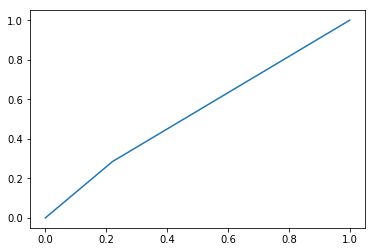

In [42]:
#AUC
y_validate_pred_proba = dt_model.predict_proba(X_validate)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_validate, y_validate_pred_proba)
display(metrics.auc(fpr, tpr))
plt.plot(fpr, tpr)

In [43]:
#Calculating NULL accuracy
1 - y_validate.mean()

0.7810140237324703

In [44]:
#Calculate Sensitivity, Specificity and Recall
tn, fp, fn, tp = conf_matrics.ravel()
sensitivity = tp/(fp + tp)
specificity = tn/(tn + fn)
recall = tp/(fn+tp)
print('sensitivity:' , sensitivity )
print('specificity:' , specificity)
print('recall:' , recall)



sensitivity: 0.5099502487562189
specificity: 0.7840865807688772
recall: 0.024333788355392013


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Building and fitting my_forest
forest = RandomForestClassifier(n_estimators = 100, criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split,  random_state = 100, verbose=1)
model = forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.9s finished


In [94]:
y_validate_pred =  model.predict(X_validate)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [95]:
#Accuracy
accuracy = accuracy_score(y_validate, y_validate_pred)
accuracy

0.7810140237324703

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


Text(0.5, 0, 'False Positive Rate(1 - Specifity)')

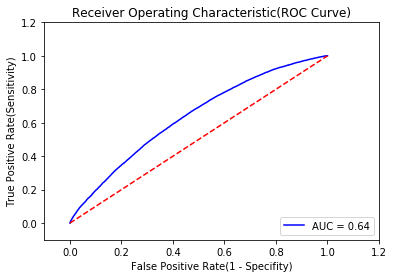

In [96]:
# ROC curve on Predicted probabilities
y_validate_pred_prob = forest.predict_proba(X_validate)
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, threshold = metrics.roc_curve(y_validate, y_validate_pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic(ROC Curve)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1 - Specifity)')

In [97]:
false_pos_rate, true_pos_rate, threshold = metrics.roc_curve(y_validate, y_validate_pred)
print(metrics.auc(false_pos_rate, true_pos_rate))
metrics.roc_auc_score(y_validate, y_validate_pred_proba)

0.5


0.5321535714203738

In [98]:
conf_matrics = metrics.confusion_matrix(y_validate, y_validate_pred)
conf_matrics

array([[60092,     0],
       [16849,     0]])

## Catboost Classifier

In [0]:
from catboost import CatBoostClassifier

In [85]:
#Build the Model
cb_model = CatBoostClassifier(iterations = 400, depth = 5, learning_rate=0.05, eval_metric='AUC', loss_function = 'Logloss', verbose = False)
cb_model.fit(X_train, y_train, eval_set=(X_validate, y_validate), use_best_model = True,plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [86]:
# feature importance - duration month is most important variable followed by poi
sorted(zip(cb_model.feature_importances_,X_train),reverse=True)

[(15.315163144918964, 'Ltv'),
 (7.992663102789407, 'Disbursed_Amount'),
 (6.4928450850136175, 'Unique_ID'),
 (5.9785695303544735, 'Current_Pincode_ID'),
 (5.124055814099064, 'Perform_CNS_Score'),
 (4.702913169620467, 'Perform_CNS_Score_Description'),
 (3.848843146492657, 'Pri_Sanctioned_Amount'),
 (3.6942751497598763, 'Manufacturer_ID'),
 (3.208777761494046, 'Branch_ID'),
 (2.972023997326261, 'PrimaryInstalAMT_CatoMean_OnStateID'),
 (2.9695958493653087, 'Credit_History_Length_In_Months'),
 (2.4138444836880506, 'Pri_No_Of_Accts'),
 (2.2960882378460696, 'Pri_Current_Balance'),
 (2.2401197206435595, 'State_ID'),
 (2.214460876224534, 'EmploymentType_Self employed'),
 (2.1755995306355573, 'Supplier_ID'),
 (2.171744840450009, 'PriCurrentBalance_CatoMean_OnStateID'),
 (2.122741803629085, 'Delinquent_Accts_In_Last_Six_Months'),
 (1.8461649300497007, 'DateOfBirth_Day'),
 (1.4657818107834149, 'DateOfBirth_Month'),
 (1.3100013797104804, 'Ltv_CatoMean_OnPriOverdueAccts'),
 (1.2057473346388585, 'As

In [87]:
cb_model.get_params()

{'depth': 5,
 'eval_metric': 'AUC',
 'iterations': 400,
 'learning_rate': 0.05,
 'loss_function': 'Logloss',
 'verbose': False}

In [88]:
#y_validate_pred =  cb_model.predict_proba(X_validate)[:,1]
y_validate_pred = cb_model.predict(X_validate)
print(roc_auc_score(y_validate,y_validate_pred))

0.505030054081279


In [89]:
#Print Confusion matrix 
conf_matrics = metrics.confusion_matrix(y_validate, y_validate_pred)
conf_matrics

array([[59944,   148],
       [16638,   211]])

In [90]:
train_predictors.shape, label.shape

((233154, 60), (233154,))

In [91]:
#AUC
false_pos_rate, true_pos_rate, threshold = metrics.roc_curve(y_validate, y_validate_pred)
metrics.auc(false_pos_rate, true_pos_rate)

0.505030054081279

In [92]:
#Accuracy
accuracy = accuracy_score(y_validate, y_validate_pred1)
accuracy

0.7812219752797598

## XG Boost

In [0]:
import xgboost as xgb
from xgboost import plot_importance

In [0]:
#Build XG Boost DMatrix
xgb_train_dmatrix = xgb.DMatrix(X_train, label = y_train)
xgb_validate_dmatrix = xgb.DMatrix(X_validate, label = y_validate)
xgb_train_all_dmatrix = xgb.DMatrix(train_predictors)
xgb_test_dmatrix = xgb.DMatrix(test_predictors)

In [0]:
params = {'booster':'gbtree', 
          'eta': 0.002,
          'tree_method': "hist",
          'max_depth': 6,
          'min_child_weight': 8,
          'subsample': 0.9,
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'objective': 'binary:logistic',
          'eval_metric': 'auc',
          'nthread':8,
          'random_state': 42, 
          'silent': True}

In [0]:
#watchlist = [(xgb_train_dmatrix, 'train'), (xgb_validate_dmatrix, 'validate')]
xgb_model = xgb.train(params, xgb_train_dmatrix, 400, verbose_eval = 1)


In [0]:
y_validate_pred = xgb_model.predict(xgb_validate_dmatrix)

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_validate, y_validate_pred)
metrics.auc(fpr, tpr)

0.646518259613456

In [66]:
test_predictors.head(1)

,Ltv,Disbursed_Amount,Perform_CNS_Score,PrimaryInstalAMT_CatoMean_OnStateID,Perform_CNS_Score_Description,Pri_Sanctioned_Amount,PriCurrentBalance_CatoMean_OnStateID,Unique_ID,Current_Pincode_ID,State_ID,DisbursedAmount_CatoMean_OnPriOverdueAccts,Credit_History_Length_In_Months,Average_Acct_Age_In_Months,Pri_Current_Balance,Pri_No_Of_Accts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,DateOfBirth_Day,AssetCost_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,Manufacturer_ID,Asset_Cost,Ltv_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnNoOfInquiries,DateOfBirth_Month,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMean_OnStateID,Pri_Active_Accts,Ltv_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnPriOverdueAccts,VoterIDFlag_1,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,Ltv_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,No_Of_Inquiries,Pri_Overdue_Accts,AssetCost_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,Supplier_ID,Branch_ID,Ltv_CatoMedian_OnStateID,EmploymentType_Self employed,AssetCost_CatoMean_OnStateID,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMean_OnNoOfInquiries,Delinquent_Accts_In_Last_Six_Months,Ltv_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMedian_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnPriActiveAccts,DisbursalDate_Week
0,1.029403,-0.067765,-0.855453,-0.314668,0.674034,-0.09201,0.564701,1.747061,-0.848865,-0.281611,-0.331368,-0.56864,-0.590198,-0.176064,-0.467804,-0.319904,-0.34236,-0.13911,-0.158302,0.302206,-1.273903,-0.150644,-1.021926,0.301641,-0.3005,-0.260786,-1.447134,-0.64963,-0.389063,-0.349565,-0.358784,-1.012004,-0.348433,-1.102847,-0.542998,-0.782884,-0.3672,-0.250646,-0.411719,-0.326051,0.601872,-0.37842,-0.368604,-0.293461,-0.285688,0.770891,-0.144216,0.907336,-0.085002,0.621908,-1.141453,-1.208691,0.802556,-0.38715,-0.254153,-0.750799,-0.59967,0.378755,-0.543268,-3.31481


In [67]:
dtest = xgb.DMatrix(test_predictors)
y_pred = xgb_model.predict(dtest)
y_pred

array([0.39546734, 0.4003937 , 0.3836913 , ..., 0.34709024, 0.38163397,
       0.31547847], dtype=float32)

## Neural Network

In [0]:
import tensorflow as tf
from tensorflow import keras

In [69]:
X_train.columns

Index(['Ltv', 'Disbursed_Amount', 'Perform_CNS_Score',
       'PrimaryInstalAMT_CatoMean_OnStateID', 'Perform_CNS_Score_Description',
       'Pri_Sanctioned_Amount', 'PriCurrentBalance_CatoMean_OnStateID',
       'Unique_ID', 'Current_Pincode_ID', 'State_ID',
       'DisbursedAmount_CatoMean_OnPriOverdueAccts',
       'Credit_History_Length_In_Months', 'Average_Acct_Age_In_Months',
       'Pri_Current_Balance', 'Pri_No_Of_Accts',
       'DisbursedAmount_CatoMedian_OnPriOverdueAccts',
       'Ltv_CatoMean_OnPriOverdueAccts',
       'PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts',
       'PrimaryInstalAMT_CatoMedian_OnPriActiveAccts',
       'AssetCost_CatoMedian_OnPriOverdueAccts',
       'AssetCost_CatoMedian_OnStateID',
       'PriCurrentBalance_CatoMedian_OnPriOverdueAccts', 'DateOfBirth_Day',
       'AssetCost_CatoMean_OnPriOverdueAccts',
       'PriCurrentBalance_CatoMedian_OnNoOfInquiries',
       'PrimaryInstalAMT_CatoMean_OnPriOverdueAccts', 'Manufacturer_ID',
       'Asset_Cost

In [70]:
train_x = X_train.iloc[:,:].astype(np.float64)
train_y = y_train.astype(np.int32)
validate_x = X_validate.iloc[:,:].astype(np.float64)
validate_y = y_validate.astype(np.int32)
train_y.dtype

dtype('int32')

In [71]:
train_x.shape[1]

60

In [72]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes = 2)
validate_y = tf.keras.utils.to_categorical(validate_y, num_classes = 2)
validate_y.shape

(76941, 2)

In [0]:
#Define hyper parameters
training_epochs = 20
learning_rate = 0.03
batch_size = 10000
dropout_rate = 0.5
momentum_rate = 0.9

#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 1500
n_nodes_hl2 = 1000
n_nodes_hl3 = 500
n_nodes_hl4 = 100

#No of output classes for classification problems
n_classes = 2

In [0]:
#Reset the graph
tf.reset_default_graph()

In [75]:
#Build the model. Our graph is sequential
model = keras.Sequential()
#Add the input layer
model.add(tf.keras.layers.InputLayer(input_shape = (train_x.shape[1],)))
model.add(tf.keras.layers.Flatten())
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Now add the hidden layers and Dropout layer(to avoid over fitting)
model.add(tf.keras.layers.Dense(n_nodes_hl1, activation='relu'))
keras.layers.Dropout(dropout_rate)
model.add(tf.keras.layers.Dense(n_nodes_hl2, activation='relu'))
keras.layers.Dropout(dropout_rate)
model.add(tf.keras.layers.Dense(n_nodes_hl3, activation='relu'))
keras.layers.Dropout(dropout_rate)
model.add(tf.keras.layers.Dense(n_nodes_hl4, activation='relu'))
keras.layers.Dropout(dropout_rate)
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))


W0713 18:15:54.803484 140433835984768 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
optimizer = tf.train.AdamOptimizer()
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])


In [77]:
validate_x.shape

(76941, 60)

In [78]:
history = model.fit(train_x, train_y, epochs = training_epochs, validation_data = (validate_x, validate_y),  verbose = 1, batch_size = batch_size)
print('Minimum Loss is: ', min(history.history['loss']))
print('Maximum Training Accuracy: ', max(history.history['acc']))
print('Maximum Test Accuracy: ', max(history.history['val_acc']))


W0713 18:15:55.195563 140433835984768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 156213 samples, validate on 76941 samples
Epoch 1/20
156213/156213 [==============================] - 2s 13us/sample - loss: 0.5495 - acc: 0.7722 - val_loss: 0.5122 - val_acc: 0.7810
Epoch 2/20
156213/156213 [==============================] - 1s 6us/sample - loss: 0.5058 - acc: 0.7839 - val_loss: 0.5072 - val_acc: 0.7810
Epoch 3/20
156213/156213 [==============================] - 1s 6us/sample - loss: 0.5021 - acc: 0.7839 - val_loss: 0.5052 - val_acc: 0.7810
Epoch 4/20
156213/156213 [==============================] - 1s 6us/sample - loss: 0.5001 - acc: 0.7839 - val_loss: 0.5042 - val_acc: 0.7810
Epoch 5/20
156213/156213 [==============================] - 1s 6us/sample - loss: 0.4988 - acc: 0.7839 - val_loss: 0.5036 - val_acc: 0.7811
Epoch 6/20
156213/156213 [==============================] - 1s 6us/sample - loss: 0.4982 - acc: 0.7839 - val_loss: 0.5027 - val_acc: 0.7812
Epoch 7/20
156213/156213 [==============================] - 1s 6us/sample - loss: 0.4971 - acc: 0.7842 - val

In [0]:
validate_y = model.predict(validate_x)
y_validate_pred = np.argmax(validate_y, axis = 1)

In [0]:
#y_validate_pred =  model.predict(X_validate).flatten()

In [81]:
y_validate.shape, y_validate_pred.shape

((76941,), (76941,))

In [82]:
#AUC
false_pos_rate, true_pos_rate, threshold = metrics.roc_curve(y_validate, y_validate_pred)
metrics.auc(false_pos_rate, true_pos_rate)

0.5051492883326026

In [83]:
train_y = model.predict_proba(train_predictors)
test_y = model.predict_proba(test_predictors)

y_train_pred = train_y[:,1]
y_test_pred = test_y[:,1]
y_test_pred

array([0.3914632 , 0.46908438, 0.42363223, ..., 0.4262645 , 0.49604994,
       0.3258501 ], dtype=float32)

In [84]:
y_test_pred

array([0.3914632 , 0.46908438, 0.42363223, ..., 0.4262645 , 0.49604994,
       0.3258501 ], dtype=float32)